In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from scipy.optimize import minimize

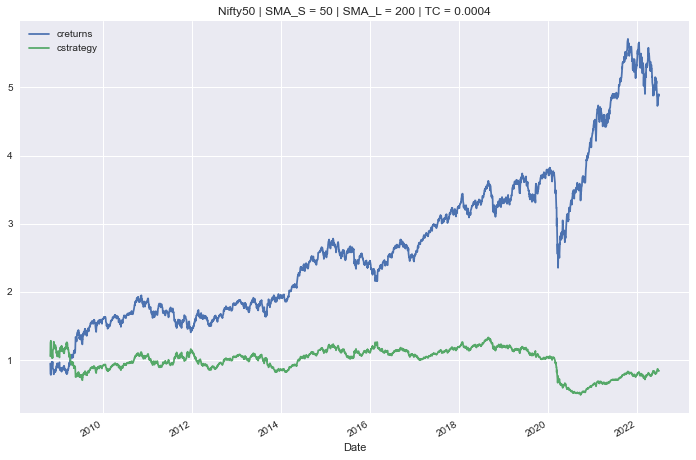

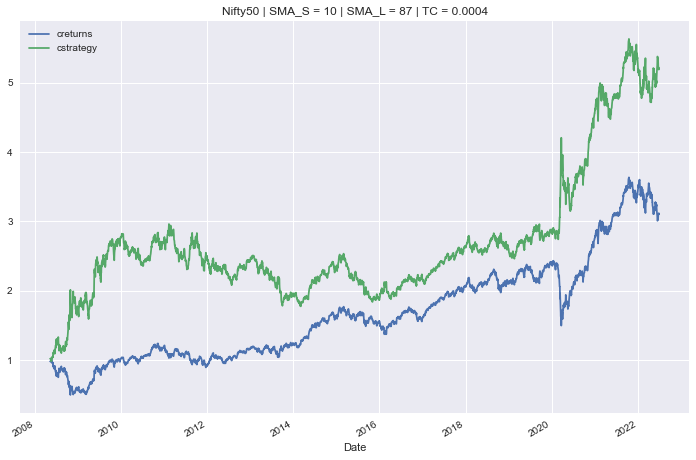

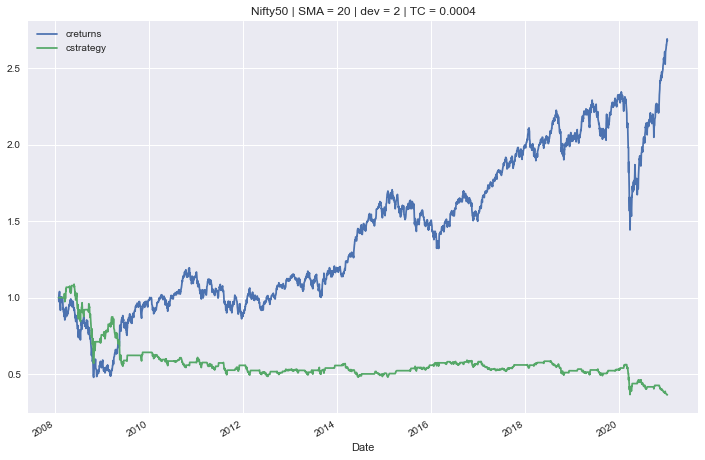

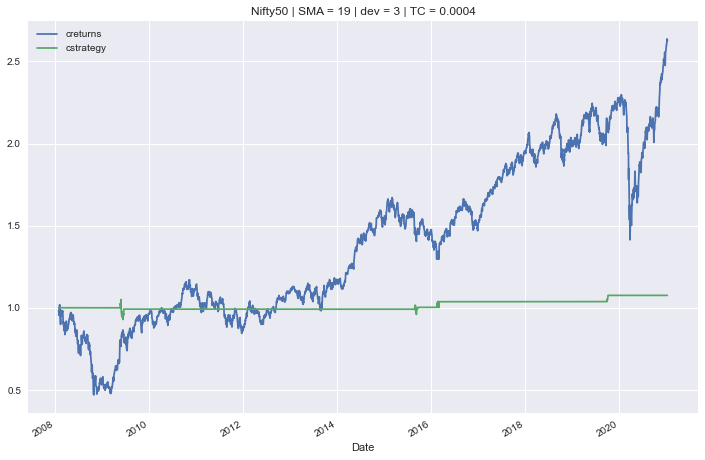

In [2]:
import SMA
import BollingerBands

In [3]:
def optimal_strategy(parameters):
    start = "2008-01-01"
    end = "2022-07-01"
    symbol = "Nifty50"
    tc = 0.0004
    
    # SMA
    tester1 = SMA.SMABacktester(symbol, int(parameters[0]), int(parameters[1]), start, end, tc)
    tester1.test_strategy()
    
    # Bollinger
    tester2 = BollingerBands.BollingerBand(symbol,  int(parameters[2]),  int(parameters[3]), start, end, tc)
    tester2.test_strategy()
    
    # Create comb
    comb = tester1.results.loc[:, ["returns", "position"]].copy()
    comb.rename(columns = {"position":"position_SMA"}, inplace = True)
    comb["position_MR"] = tester2.results.position
    
    comb["position_comb"] = np.sign(comb.position_MR + comb.position_SMA)
    
#     comb["hour"] = comb.index.hour
#     comb.position_comb = np.where(comb.hour.between(3.30, 11.30), comb.position_comb, 0)
    
    # Backtest
    comb["strategy"] = comb["position_comb"].shift(1) * comb["returns"]
    comb.dropna(inplace=True)
    comb["trades"] = comb.position_comb.diff().fillna(0).abs()
    comb.strategy = comb.strategy - comb.trades * tc
    comb["creturns"] = comb["returns"].cumsum().apply(np.exp)
    comb["cstrategy"] = comb["strategy"].cumsum().apply(np.exp)
    
    return -comb["cstrategy"].iloc[-1]

# opts = minimize(optimal_strategy, start_par, method = "Powell" , bounds = bnds)
# 55, 160, 59, 3

In [4]:
optimal_strategy((46, 81, 9, 3))

-1.4392218072023353

In [5]:
bnds =  ((30, 60), (70, 100), (5, 50), (1, 5))

In [6]:
start_par = (46, 81, 9, 3)

In [7]:
opts = minimize(optimal_strategy, start_par, method = "Powell" , bounds = bnds)

In [8]:
opts

   direc: array([[1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.31247178, 0.31687474, 0.07097247, 0.01306283]])
     fun: -4.204757888760012
 message: 'Optimization terminated successfully.'
    nfev: 187
     nit: 2
  status: 0
 success: True
       x: array([57.65384539, 92.32302589, 11.46511835,  3.45371721])

In [9]:
optimal_strategy(opts.x)

-4.204757888760012